In [1]:
import torch
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import os
import fnmatch
import locale
import sys

locale.setlocale(locale.LC_ALL, '')
sys.path.insert(1, os.path.join(sys.path[0], '..'))

#### Constants
---

In [19]:
images_path = "C:/Users/celes/Documents/planes/avia-train/"

#### Load photos
---

In [21]:
import glob
glob.glob("C:/Users/celes/Documents/planes/avia-train/*.png");

In [22]:
def collect_paths(parrent_path, pattern="*.tif"):
    """ Recoursively get all paths by pattern
    and return them as list
    """
    results = []
    for base, _, files in os.walk(parrent_path):
        goodfiles = fnmatch.filter(files, pattern)
        results.extend(os.path.join(base, f) for f in goodfiles)
    
    return results

In [24]:
paths = collect_paths(images_path, pattern="*.png")
print(f"Amount of photos: {len(paths)}")

Amount of photos: 31080


#### Load metadata
---

In [6]:
with open("../train", "r") as file:
    data = pd.read_csv(file)

In [7]:
data["sign"].value_counts()

0    23181
1     7899
Name: sign, dtype: int64

#### Dataset
---
Wrap all this logic by torch dataset 

In [ ]:
# for x, y in dataloader:
#     y_hat = model(x)
#     loss_value = loss(y_hat, y)
    
# #     fitting

# data -> Dataset -> Dataloader

In [8]:
class PlaneSet(torch.utils.data.Dataset):
    def __init__(self, dir_path, df):
        super().__init__()
        self.dir_path = dir_path
        self.df = df
        
    def expand_path(self, name):
        return self.dir_path + name + ".png"
        
    def __getitem__(self, idx):
        _class, name = tuple(self.df.iloc[idx])
        
        path = self.expand_path(name)
        img_arr = np.array(Image.open(path))
        
        return img_arr, _class
    
    def __len__(self):
        return len(self.df)

In [9]:
train_set = PlaneSet(images_path, data)

In [10]:
img, _class = train_set[0]

print(f"image shape: {img.shape}\t|\t image class: {_class}")

image shape: (20, 20, 3)	|	 image class: 0


#### Visualize the planes
---

In [40]:
planes = [train_set[i] for i in range(100)]
arg = planes[30:39]

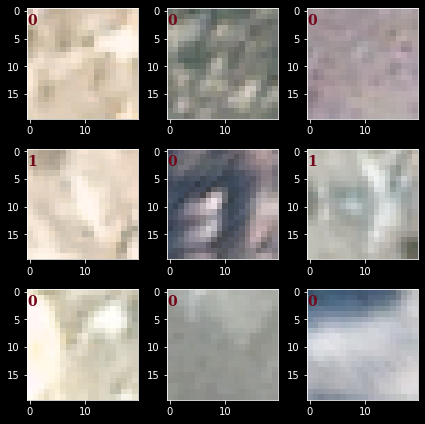

In [41]:
def plot_grid(arg):
    plt.style.use("dark_background")
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    font = {
        "family": "serif",
        "color":  "#73081A",
        "weight": "bold",
        "size": 14,
    }
    plt.rcParams['axes.titley'] = 1.3    # y is in axes-relative coordinates.
    
    for j in range(3):
        for i,ax in enumerate(axes[j]):
            ax.imshow(planes[i+(j*3)][0], interpolation='nearest')
            ax.set_title(planes[i+(j*3)][1], fontdict=font, loc='left', pad=-50)

    fig.tight_layout()
    plt.show()
    
plot_grid(planes)

#### Dataloader
---

In [49]:
from torch.utils.data import DataLoader

train = DataLoader(train_set, shuffle=True, batch_size=1)

In [52]:
for ind, (x, y) in enumerate(train):
    print(x.shape, y)
    
    if ind % 5 == 0 and ind != 0:
        break

torch.Size([1, 20, 20, 3]) tensor([0])
torch.Size([1, 20, 20, 3]) tensor([0])
torch.Size([1, 20, 20, 3]) tensor([1])
torch.Size([1, 20, 20, 3]) tensor([0])
torch.Size([1, 20, 20, 3]) tensor([0])
torch.Size([1, 20, 20, 3]) tensor([0])
